# Leistungsnachweis 2 - Mcqulat, Joyce, Carmen



## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
 Todesfälle bei Alkohol- und Drogenmissbrauch
### 1.2 Fragestellung:
Welche demografischen, geografischen und sozioökonomischn Faktoren korrelieren mit der Häufigkeit von Alkohol- und Drogenbedingten Todesfällen (Kontinent) über die Zeitspanne von 2000-2021?   
### 1.3 Datenquelle(n):
- https://ourworldindata.org/illicit-drug-use
-




### 1.4 Daten beschaffen und laden

In [239]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [241]:
# Datensatz
df_orig = pd.read_csv("Datensatz.csv", names=["Gebiet", "ID", "Jahr", "Sterberate_drogenkonsum"], skiprows=1)
df_orig

,Gebiet,ID,Jahr,Sterberate_drogenkonsum
0,Afghanistan,AFG,2000,1.372769
1,Afghanistan,AFG,2001,1.395729
2,Afghanistan,AFG,2002,1.375031
3,Afghanistan,AFG,2003,1.387097
4,Afghanistan,AFG,2004,1.403695
...,...,...,...,...
4417,Zimbabwe,ZWE,2017,0.696490
4418,Zimbabwe,ZWE,2018,0.746735
4419,Zimbabwe,ZWE,2019,0.732875
4420,Zimbabwe,ZWE,2020,0.745262


In [242]:
# Kontinent
contintents = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]
df_continents = df_orig[df_orig['Gebiet'].isin(contintents)]
df_continents

,Gebiet,ID,Jahr,Sterberate_drogenkonsum
22,Africa,NaN,2000,1.028038
23,Africa,NaN,2001,1.024833
24,Africa,NaN,2002,1.037203
25,Africa,NaN,2003,1.037875
26,Africa,NaN,2004,1.029823
...,...,...,...,...
3691,South America,NaN,2017,2.490394
3692,South America,NaN,2018,2.485325
3693,South America,NaN,2019,2.390907
3694,South America,NaN,2020,2.957083


In [243]:
# Kontinent 2
years = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
df_years = df_orig[df_orig['Gebiet'].isin(years)]
df_continents

,Gebiet,ID,Jahr,Sterberate_drogenkonsum
22,Africa,NaN,2000,1.028038
23,Africa,NaN,2001,1.024833
24,Africa,NaN,2002,1.037203
25,Africa,NaN,2003,1.037875
26,Africa,NaN,2004,1.029823
...,...,...,...,...
3691,South America,NaN,2017,2.490394
3692,South America,NaN,2018,2.485325
3693,South America,NaN,2019,2.390907
3694,South America,NaN,2020,2.957083


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [244]:
# Pivot Alle
df_pivot = df_orig.pivot(index='Gebiet', columns='Jahr', values='Sterberate_drogenkonsum')
df_pivot

Jahr,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.372769,1.395729,1.375031,1.387097,1.403695,1.403987,1.388047,1.365308,1.334761,1.272544,...,1.353126,1.368210,1.371491,1.353963,1.369290,1.427865,1.446979,1.453580,1.454035,1.541018
Africa,1.028038,1.024833,1.037203,1.037875,1.029823,1.015446,1.024987,1.023400,1.044850,1.054400,...,1.071226,1.074564,1.078596,1.091034,1.094272,1.107987,1.135993,1.146920,1.127753,1.215895
Albania,1.374281,1.248409,1.290197,1.337863,1.370391,2.170059,2.187860,2.293278,2.305459,2.336419,...,1.467054,1.483883,1.432683,1.382836,1.399483,1.354467,1.316988,1.265535,1.085861,0.878898
Algeria,1.352478,1.367938,1.383476,1.354104,1.331860,1.337907,1.325494,1.306768,1.291366,1.279547,...,1.213428,1.221611,1.210624,1.193405,1.172652,1.183668,1.214825,1.220362,1.010295,1.393704
Andorra,0.574747,0.619095,0.606762,0.568113,0.623782,0.576116,0.598198,0.588333,0.578392,0.568497,...,0.534948,0.588359,0.586232,0.599170,0.620151,0.568697,0.559746,0.589306,0.733374,0.392122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1.231501,1.260809,1.282428,1.296814,1.326259,1.375344,1.411215,1.517609,1.623394,1.694277,...,1.879435,1.940095,2.025680,2.097853,2.111471,2.106813,2.136053,2.181146,2.000938,2.132299
World,3.816866,3.847529,3.908566,3.936510,3.940024,3.997463,3.823536,3.681023,3.631181,3.463880,...,3.245137,3.265316,3.359563,3.423905,3.574148,3.652893,3.642295,3.660673,4.014630,4.231057
Yemen,1.051388,1.073108,1.079414,1.073120,1.070639,1.081767,1.064221,1.138615,1.162073,1.156158,...,1.144398,1.161318,1.197371,1.185557,1.254594,1.230789,1.216186,1.172865,1.061639,1.222013


In [180]:
# Pivot Kontinet
df_pivot = df_continents.pivot(index='Gebiet', columns='Jahr', values='Sterberate_drogenkonsum')
df_pivot.head()

Jahr,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Gebiet,,,,,,,,,,,,,,,,,,,,,
Africa,1.028038,1.024833,1.037203,1.037875,1.029823,1.015446,1.024987,1.023400,1.044850,1.054400,...,1.071226,1.074564,1.078596,1.091034,1.094272,1.107987,1.135993,1.146920,1.127753,1.215895
Asia,2.098514,2.027772,1.986144,1.948191,1.954247,1.941535,1.901419,1.885871,1.876298,1.848902,...,1.766062,1.755328,1.764280,1.765292,1.777003,1.818136,1.845138,1.873058,1.841871,1.810710
Europe,14.587547,15.258791,15.767808,16.142710,16.129038,16.404879,14.749776,13.789412,13.359900,12.107398,...,10.250076,10.205623,10.623964,10.449649,10.424955,10.087612,10.205506,9.904937,9.599533,9.828240
North America,6.429989,6.685980,7.333654,7.705354,7.954963,8.577537,9.310800,9.070653,9.241040,9.284315,...,10.096892,10.656885,11.453345,12.648228,14.695362,16.041958,15.653575,16.263073,21.376522,24.205437
Oceania,5.447703,3.403300,3.259770,3.385526,3.324893,3.700018,3.295572,3.481835,3.872326,4.086673,...,3.904985,3.830023,4.481861,4.640277,4.875943,4.986824,4.822925,4.806808,4.794689,4.549628


In [235]:
#Africa
africa = df_pivot.loc[['Africa']]
print(africa)

#Asia
asia = df_pivot.loc['Asia']
print(asia)

#Europe
europe = df_pivot.loc['Europe']
print(europe)

#North America
northamerica = df_pivot.loc['North America']
print(northamerica)

#Oceania
oceania = df_pivot.loc['Oceania']
print(oceania)

#South America
southamerica  = df_pivot.loc['South America']
print(southamerica)


Jahr        2000      2001      2002      2003      2004      2005      2006  \
Gebiet                                                                         
Africa  1.028038  1.024833  1.037203  1.037875  1.029823  1.015446  1.024987   

Jahr      2007     2008    2009  ...      2012      2013      2014      2015  \
Gebiet                           ...                                           
Africa  1.0234  1.04485  1.0544  ...  1.071226  1.074564  1.078596  1.091034   

Jahr        2016      2017      2018     2019      2020      2021  
Gebiet                                                             
Africa  1.094272  1.107987  1.135993  1.14692  1.127753  1.215895  

[1 rows x 22 columns]
Jahr
2000    2.098514
2001    2.027772
2002    1.986144
2003    1.948191
2004    1.954247
2005    1.941535
2006    1.901419
2007    1.885871
2008    1.876298
2009    1.848902
2010    1.834797
2011    1.803690
2012    1.766062
2013    1.755328
2014    1.764280
2015    1.765292
2016    1.7770

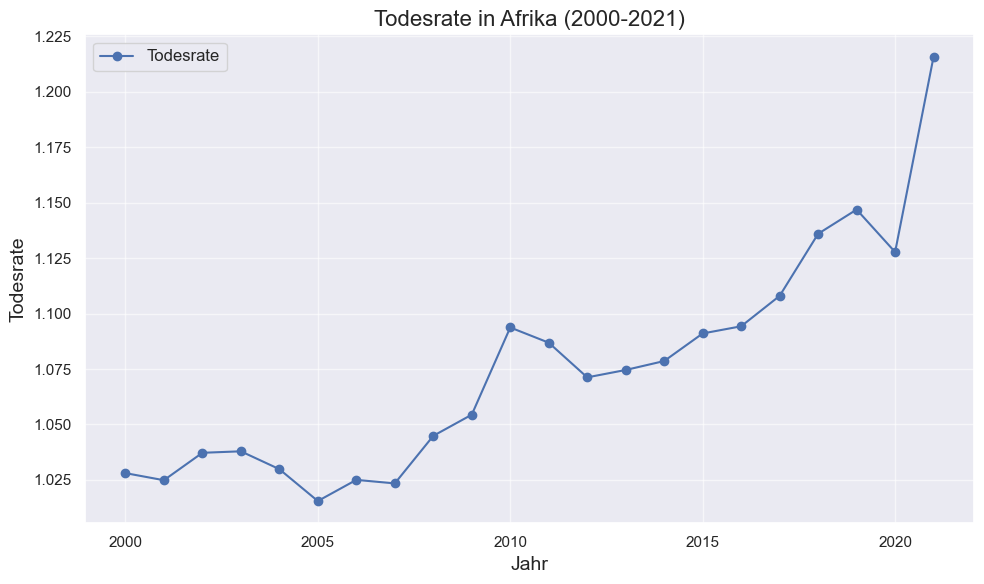

In [236]:

# df_pivot = df_continents.pivot(index='Gebiet', columns='Jahr', values='Sterberate_drogenkonsum')
africa = df_pivot.loc[['Africa']]

# Daten umformen: Zeilen in eine Zeitreihe (Jahr, Sterberate)
data = africa.T.reset_index()
data.columns = ['Jahr', 'Sterberate']

# Graph erstellen
plt.figure(figsize=(10, 6))
plt.plot(data['Jahr'], data['Sterberate'], marker='o', color='b', label="Todesrate")

# Titel und Achsenbeschriftungen
plt.title("Todesrate in Afrika (2000-2021)", fontsize=16)
plt.xlabel("Jahr", fontsize=14)
plt.ylabel("Todesrate", fontsize=14)

# Gitter und Legende
plt.grid(True, alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Graph anzeigen
plt.show()

## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [ ]:
df_continents.dtypes

In [245]:
# Anzahl Kontinente
print('Anzahl Kontinente: ', len(df_continents['Gebiet'].unique()))

Anzahl Kontinente:  6


In [246]:
# Datenpunkte_ Gebiet
df_continents['Gebiet'].value_counts()

Gebiet
Africa           22
Asia             22
Europe           22
North America    22
Oceania          22
South America    22
Name: count, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Kontinent'}, xlabel='Kontinente', ylabel='Anzahl Datenpunkte'>

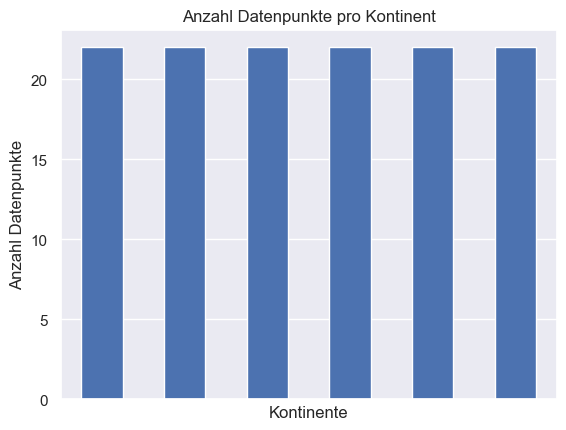

In [247]:
df_continents['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],   
                                 xlabel='Kontinente', ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Kontinent')

In [ ]:
# Datenpunkte_Jahr
print('Anzahl verschiedener Codes: ', len(df_continents['Jahr'].unique()))

Anzahl verschiedener Codes:  22


In [248]:
# Anzahl Datenpunkte pro Jahr
df_continents['Jahr'].value_counts()

Jahr
2000    6
2001    6
2020    6
2019    6
2018    6
2017    6
2016    6
2015    6
2014    6
2013    6
2012    6
2011    6
2010    6
2009    6
2008    6
2007    6
2006    6
2005    6
2004    6
2003    6
2002    6
2021    6
Name: count, dtype: int64

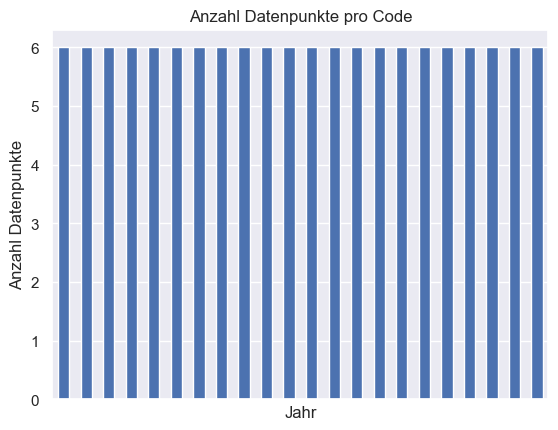

In [249]:
# Anzahl Datenpunkte pro Jahr
df_continents['Jahr'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

In [250]:
print('Anzahl verschiedener Sterberate_drogenkonsum: ', len(df_continents['Sterberate_drogenkonsum'].unique()))

Anzahl verschiedener Sterberate_drogenkonsum:  132


In [251]:
# Anzahl Datenpunkte pro Jahr
df_continents['Sterberate_drogenkonsum'].value_counts().sort_index()


Sterberate_drogenkonsum
1.015446     1
1.023400     1
1.024833     1
1.024987     1
1.028038     1
            ..
16.142710    1
16.263073    1
16.404879    1
21.376522    1
24.205437    1
Name: count, Length: 132, dtype: int64

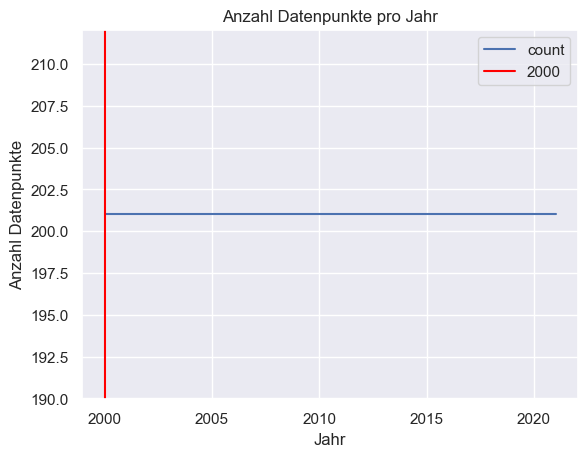

In [252]:
# Datenpunkte von gnzen Datensatz dt_orig
g = df_orig['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=2000, color='red',label='2000') 
g.legend()  

In [253]:
# Analyse Todensfälle bei Drogenkonsum
df_continents.describe()

,Jahr,Sterberate_drogenkonsum
count,132.000000,132.000000
mean,2010.500000,5.608987
std,6.368458,5.083372
min,2000.000000,1.015446
25%,2005.000000,1.847961
50%,2010.500000,3.117411
75%,2016.000000,9.487532
max,2021.000000,24.205437


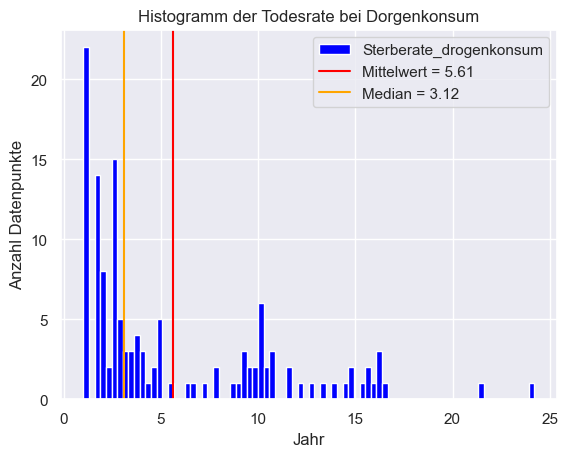

In [254]:
g = df_continents['Sterberate_drogenkonsum'].plot(kind='hist', bins=80, title='Histogramm der Todesrate bei Dorgenkonsum', 
                           xlabel='Jahr', ylabel='Anzahl Datenpunkte', color= 'blue')
mean = df_continents['Sterberate_drogenkonsum'].mean()
g.axvline(x=df_continents['Sterberate_drogenkonsum'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rot: Mittelwert

median = df_continents['Sterberate_drogenkonsum'].median()
g.axvline(x=df_continents['Sterberate_drogenkonsum'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange: Median

g.legend()

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

